In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom functions
from utils import save_sorted_df
from utils import load_sorted_df

In [61]:
path_to_data = 'data/train.csv'
df = pd.read_csv(path_to_data)

missing_values_target = df.target.isna().sum()  # Or df['Column2'].isnull().sum()
print(f"Missing values in target: {missing_values_target}")

# remove target missing values 
df.dropna(subset=['target'], inplace=True)

Missing values in target: 88


In [62]:
print(df.columns)
df

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [63]:
# I don't think the row_id is an informative variable
df.drop(columns=['row_id'], inplace=True)

In [64]:
n_series     = len(np.unique(df.stock_id)) # how many distinct time series we have
n_time_steps = len(np.unique(df.time_id))  # how many time steps there are per time series

print(f'There are {n_series} unique stocks with {n_time_steps} time steps each')

There are 200 unique stocks with 26455 time steps each


In [65]:
df.shape

(5237892, 16)

In [66]:
# compute percentage of missing values
for feature in df.columns:
    pcg_mv = round(100*df[feature].isna().sum()/df.shape[0], 2)
    if pcg_mv: print(feature + f' has {pcg_mv}% of missing values')

far_price has 55.26% of missing values
near_price has 54.55% of missing values


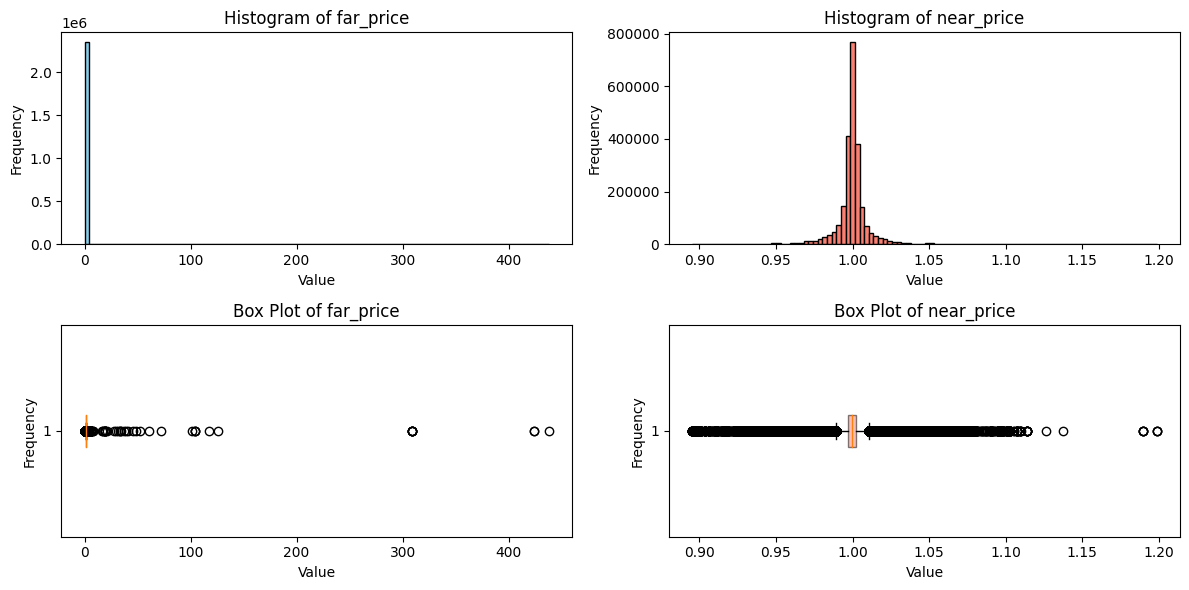

In [67]:
# Filter out rows with missing values in 'far_price' and 'near_price'
df_filtered = df.dropna(subset=['far_price', 'near_price'])

# Create histograms for 'far_price' and 'near_price'
plt.figure(figsize=(12, 6))  # Adjust the figure size

# Create the histograms on the top row
plt.subplot(2, 2, 1)
plt.hist(df_filtered['far_price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of far_price')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.yscale('log')  # Apply log scale to the y-axis

plt.subplot(2, 2, 2)
plt.hist(df_filtered['near_price'], bins=100, color='salmon', edgecolor='black')
plt.title('Histogram of near_price')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.yscale('log')  # Apply log scale to the y-axis

# Create the box plots on the bottom row
plt.subplot(2, 2, 3)
boxprops = dict(facecolor='skyblue', alpha=0.5)  # Customize box color and alpha
plt.boxplot(df_filtered['far_price'].dropna(), 
            vert=False, 
            patch_artist=True,
            boxprops=boxprops)
plt.title('Box Plot of far_price')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
boxprops = dict(facecolor='salmon', alpha=0.5)  # Customize box color and alpha
plt.boxplot(df_filtered['near_price'].dropna(), 
            vert=False, 
            patch_artist=True,
            boxprops=boxprops)
plt.title('Box Plot of near_price')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [68]:
# for the basline strategy we'll impute the missing values with the median value
df['far_price'].fillna(df['far_price'].median(), inplace=True)
df['near_price'].fillna(df['near_price'].median(), inplace=True)

In [95]:
# group by 'stock_id' and sort each group by 'time_id'
grouped = df.groupby('stock_id')
sorted_dfs = [group.sort_values(by='time_id') for _, group in grouped]

# save preprocessed data
save_sorted_df('data/preprocessed_data.pkl', sorted_dfs)

File has been succesfully saved at: data/preprocessed_data.pkl


In [70]:
time_series_0 = sorted_dfs[0]
time_series_0.head(20)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999883,0.999889,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
191,0,0,10,1299772.70,1,1.000026,15261106.63,0.999883,0.999889,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1
382,0,0,20,1299772.70,1,0.999919,15261106.63,0.999883,0.999889,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2
573,0,0,30,1299772.70,1,1.000133,15261106.63,0.999883,0.999889,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3
764,0,0,40,1218204.43,1,1.000455,15342674.90,0.999883,0.999889,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4
955,0,0,50,1218204.43,1,1.000455,15342674.90,0.999883,0.999889,1.000348,42012.00,1.000455,9897.22,1.000434,0.599623,5
1146,0,0,60,1218204.43,1,1.000562,15342674.90,0.999883,0.999889,1.000455,14005.50,1.000562,10085.04,1.000517,-0.200272,6
1337,0,0,70,1264494.89,1,1.000455,15352380.96,0.999883,0.999889,1.000348,37904.16,1.000455,17366.82,1.000421,2.410412,7
1528,0,0,80,1189832.86,1,1.000241,15427043.00,0.999883,0.999889,1.000133,9427.34,1.000241,61984.40,1.000148,-0.389814,8
1719,0,0,90,1189272.89,1,1.000562,15427602.97,0.999883,0.999889,1.000348,23340.00,1.000562,40433.54,1.000426,-4.339814,9


Text(0.5, 1.0, 'Target value for stock_id = 0')

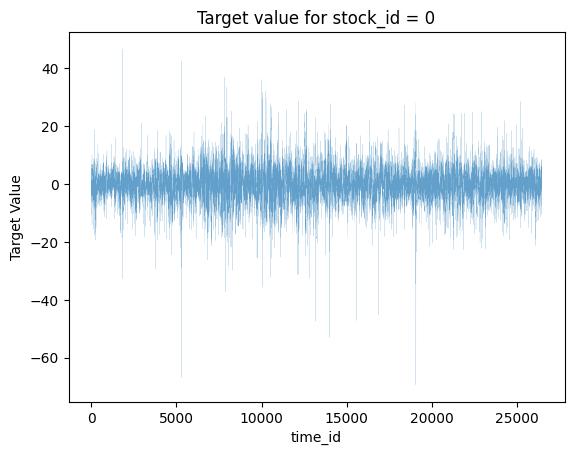

In [71]:
plt.plot(time_series_0.time_id, 
         time_series_0.target, 
         lw=0.1,
         alpha=0.7)

plt.ylabel('Target Value')
plt.xlabel('time_id')
plt.title('Target value for stock_id = 0')

In [72]:
df['seconds_in_bucket'].unique() # last 60 seconds can't be computed because the market closes

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540])

In [73]:
path_to_test = "data/example_test_files/test.csv"
df_test      = pd.read_csv(path_to_test)

df_test.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.0,26290,478_0_0
1,1,478,0,985977.11,-1,1.000245,3850033.97,NaN,NaN,0.999940,1967.90,1.000601,19692.00,1.0,26290,478_0_1
2,2,478,0,599128.74,1,1.000584,4359198.25,NaN,NaN,0.999918,4488.22,1.000636,34955.12,1.0,26290,478_0_2
3,3,478,0,2872317.54,-1,0.999802,27129551.64,NaN,NaN,0.999705,16082.04,1.000189,10314.00,1.0,26290,478_0_3
4,4,478,0,740059.14,-1,0.999886,8880890.78,NaN,NaN,0.999720,19012.35,1.000107,7245.60,1.0,26290,478_0_4


In [74]:
len(df_test['stock_id'].unique()) # In the test set we have the same stocks as the ones we have in the train set

200

In [91]:
!say "get schwifty daddy" -o 'merda.aiff'